In [12]:
import lib.draw as draw
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [13]:
df = pd.read_csv('data/ronaldo_calma.csv')
df.head()

,player,frame,x,y,z,dx,dy,coords,player_num,player_obj,team,num,name,edgecolor,bgcolor
0,0,0,38.217627,15.961068,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,37.447818,15.742122,0.0,-0.769809,-0.218947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,36.729118,15.537712,0.0,-0.718700,-0.204410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,36.058134,15.346873,0.0,-0.670984,-0.190839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,35.431698,15.168704,0.0,-0.626436,-0.178169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.x.min(), df.x.max(), df.y.min(), df.y.max() 

(22.44897959183673, 100.68027210884354, 2.969470828188662, 77.52100840336135)

In [15]:
frame = df[df.frame==131].copy()
frame.edgecolor.fillna('white', inplace=True)
frame.bgcolor.fillna('black', inplace=True)
frame.head()

,player,frame,x,y,z,dx,dy,coords,player_num,player_obj,team,num,name,edgecolor,bgcolor
131,0,131,58.484952,4.229453,0.0,1.001746,1.127175,NaN,NaN,NaN,NaN,NaN,NaN,white,black
420,12,131,64.391364,39.577383,NaN,0.296853,-0.367343,"(345.41952933825837, 240.82930355891276)",7.0,12.0,attack,NaN,NaN,black,white
709,2759,131,57.485238,3.144226,NaN,0.002033,0.041948,"(320.5122968343679, 445.02503351831626)",NaN,2759.0,attack,NaN,NaN,black,white
998,3096,131,59.379146,22.602492,NaN,0.361952,-0.146365,"(386.1912644062121, 360.52337727507506)",NaN,3096.0,attack,NaN,NaN,black,white
1287,4347,131,35.777975,5.609914,NaN,0.107295,0.034617,"(501.9462778956536, 451.0505059278438)",NaN,4347.0,attack,NaN,NaN,black,white


In [16]:
train_set = frame[~frame.team.isna()].copy()
train_set.team = (train_set.team == 'attack') * 2 - 1
train_set['x_1dx'] = train_set.x + 10 * train_set.dx
train_set['y_1dy'] = train_set.y + 10 * train_set.dy
train_set['x_2dx'] = train_set.x + 20 * train_set.dx
train_set['y_2dy'] = train_set.y + 20 * train_set.dy

In [17]:
delay_0_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
delay_0_model.fit(train_set[['x','y']], train_set['team']);

delay_1_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
delay_1_model.fit(train_set[['x_1dx','y_1dy']], train_set['team']);

delay_2_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
delay_2_model.fit(train_set[['x_2dx','y_2dy']], train_set['team']);

In [18]:
grid = pd.DataFrame([[i/1.05, j/0.68, i/1.05, j/0.68, i/1.05, j/0.68] for i in range(106) for j in range(69)], columns=['x','y','x_1dx','y_1dy','x_2dx','y_2dy'])

In [19]:
grid['delay_0_control'] = delay_0_model.predict(grid[['x', 'y']])
grid['delay_1_control'] = delay_1_model.predict(grid[['x_1dx', 'y_1dy']])
grid['delay_2_control'] = delay_2_model.predict(grid[['x_2dx', 'y_2dy']])
grid['control'] = grid['delay_0_control'] + grid['delay_1_control'] + grid['delay_2_control']

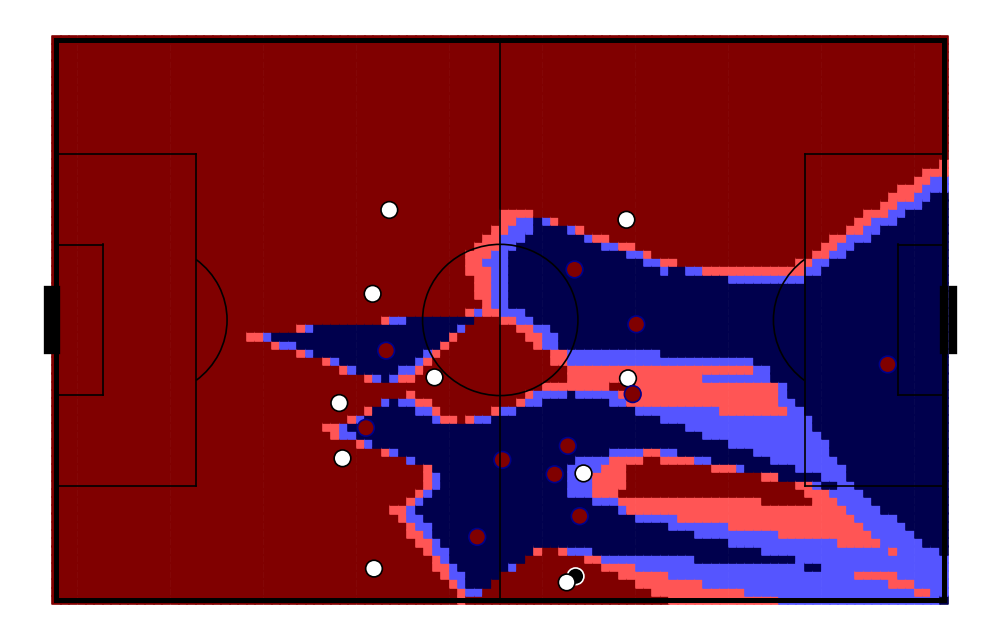

In [20]:
draw.pitch(dpi=120)
plt.scatter(grid.x, grid.y, s=25, marker='s', c=grid.control, cmap='seismic');
plt.scatter(frame.x, frame.y, s=100, c=frame.bgcolor.values, edgecolors=frame.edgecolor);

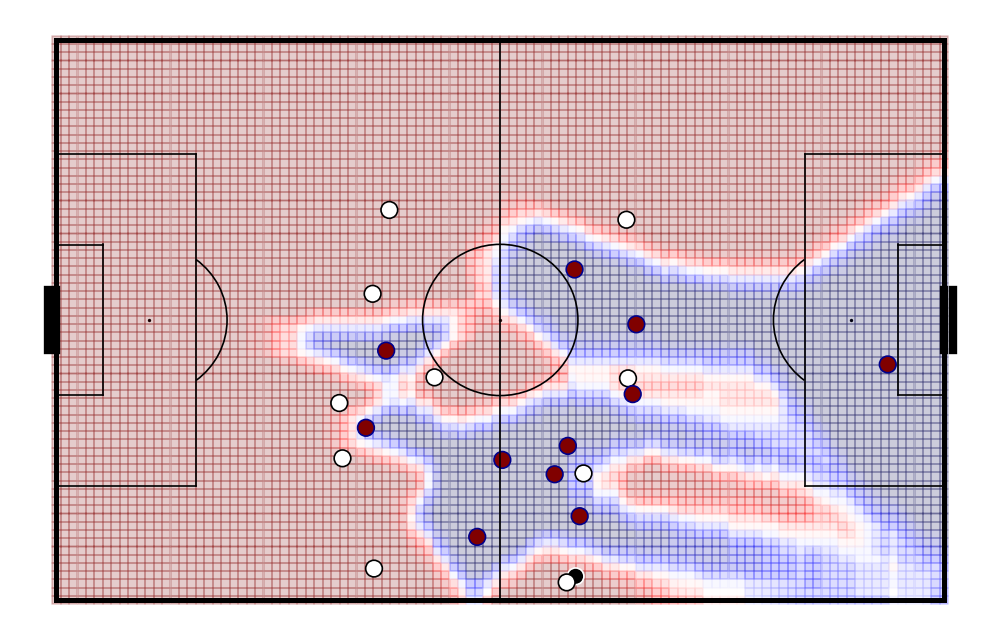

In [21]:
draw.pitch(dpi=120)
for x in grid.x.unique():
    row = grid[grid.x == x]
    grid.loc[grid.x == x, 'control'] = grid.loc[grid.x == x, 'control'].rolling(5, min_periods=1, center=True).mean()
    grid.loc[grid.y == x, 'control'] = grid.loc[grid.y == x, 'control'].rolling(5, min_periods=1, center=True).mean()
plt.scatter(grid.x, grid.y, s=25, marker='s', c=grid.control, cmap='seismic', alpha=0.2);
plt.scatter(frame.x, frame.y, s=100, c=frame.bgcolor.values, edgecolors=frame.edgecolor);

NameError: name 'np' is not defined

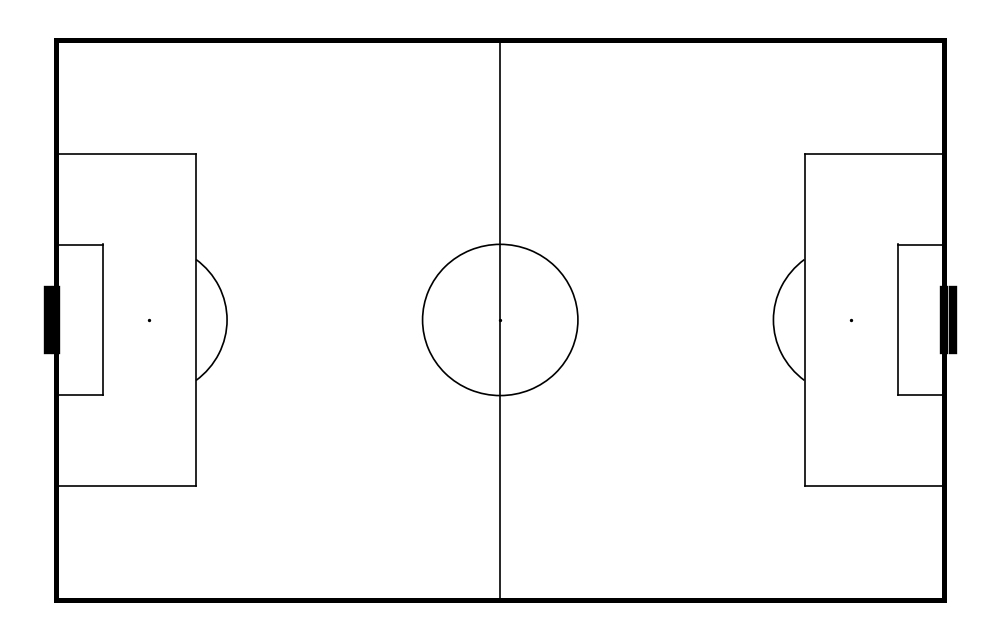

In [22]:
draw.pitch(dpi=120)
for x in grid.x.unique():
    row = grid[grid.x == x]
    grid.loc[grid.x == x, 'control'] = grid.loc[grid.x == x, 'control'].rolling(5, min_periods=1, center=True).mean()
    grid.loc[grid.y == x, 'control'] = grid.loc[grid.y == x, 'control'].rolling(5, min_periods=1, center=True).mean()
    mat_data = []
grid = grid.sort_values(['y', 'x'])
for i in range(101):
    mat_data.append(grid.control[i * 101: (i+1) * 101].values / 6 + 0.5)
mat_data = np.array(mat_data)
plt.imshow(mat_data, cmap='seismic', interpolation='nearest', alpha=0.5, zorder=1);
plt.rcParams['figure.figsize'] = (10.5,6.8)
plt.scatter(frame.x, frame.y, s=100, c=frame.bgcolor.values, edgecolors=frame.edgecolor, zorder=2);

In [ ]:
mat_data = []
for i in range(101):
    mat_data.append(grid.control[i * 101: (i+1) * 101].values / 6 + 0.5)
np.array(mat_data)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.3722065 , 0.37132579, 0.36952461, ..., 1.        , 1.        ,
        1.        ],
       [0.36828227, 0.3672863 , 0.36532831, ..., 1.        , 1.        ,
        1.        ],
       [0.36447218, 0.36340763, 0.36135259, ..., 1.        , 1.        ,
        1.        ]])

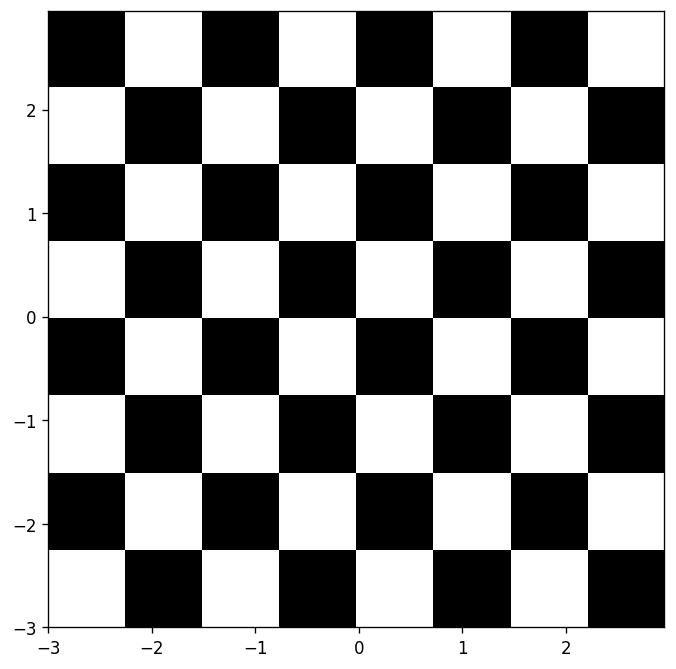

In [ ]:
import numpy as np
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)

In [ ]:
Z1

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])